In [10]:
%%time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import uproot
from pyts.visualization import plot_mtf, plot_gasf, plot_gadf, plot_recurrence_plots


file = "Piled_2.root"


CPU times: user 26 µs, sys: 0 ns, total: 26 µs
Wall time: 31 µs


In [11]:
def reader_pmtall(path):
    extra = np.arange(4096, 4480)
    
    tree = uproot.open(path)["tree"]
    pmtall = tree.array("PMTALL")
    pmtall = np.delete(pmtall, extra, axis=1)
    pedestal = tree.array("Pedestal")
    pedestal = pedestal[:,0]
    
    for i in range(len(pedestal)):
        pmtall[i] = -(pmtall[i]-pedestal[i])
    
    return pmtall

def reader(path,branch,number):
    tree = uproot.open(path)["tree"]
    column = tree.array(branch)
    column = column[:,number]
    return column

def reader_lone(path,branch):
    tree = uproot.open(path)["tree"]
    column = tree.array(branch)
    return column


2073


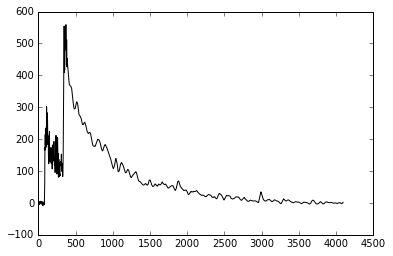

4649.9155
0.06426482


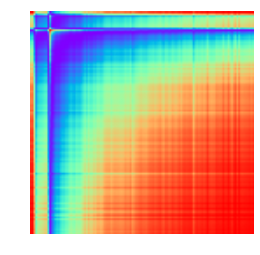

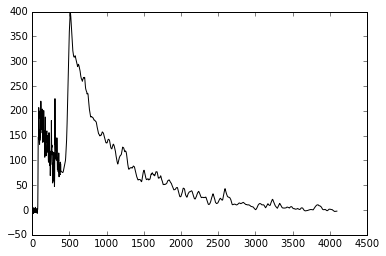

4550.003
0.06315902


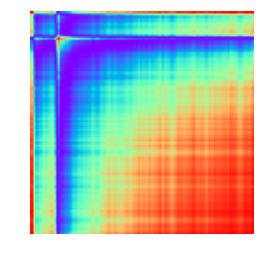

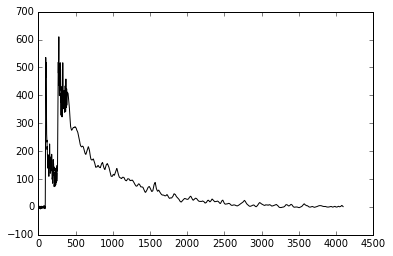

4564.312
0.0729677


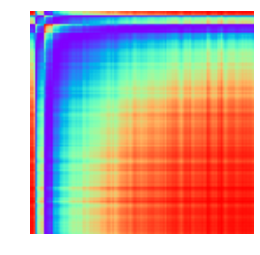

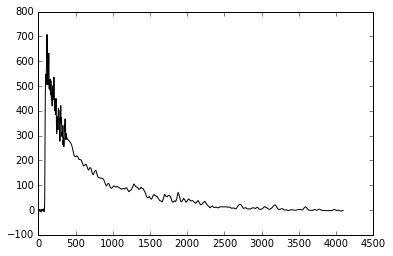

5176.3877
0.17198923


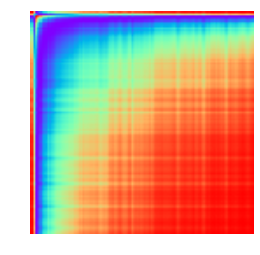

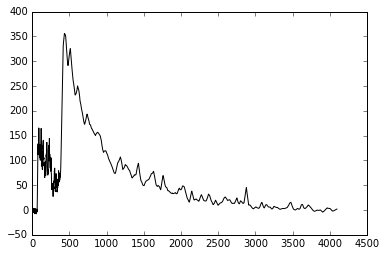

4248.5786
0.050748143


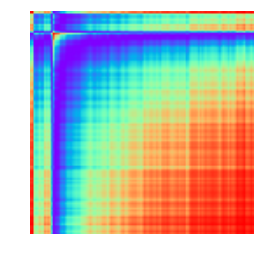

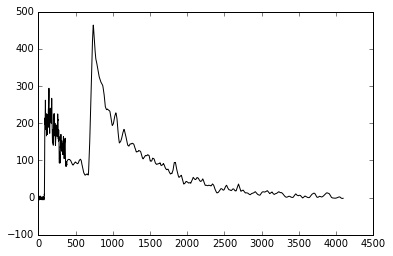

4943.314
0.073793106


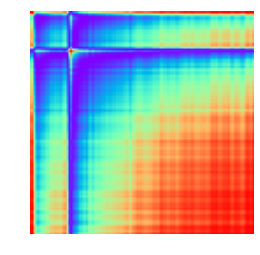

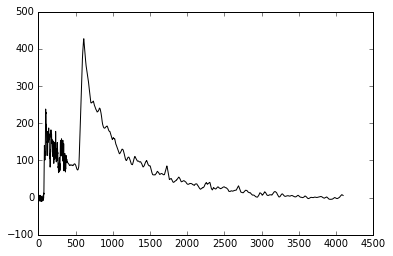

4239.4316
0.058685515


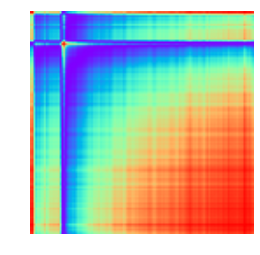

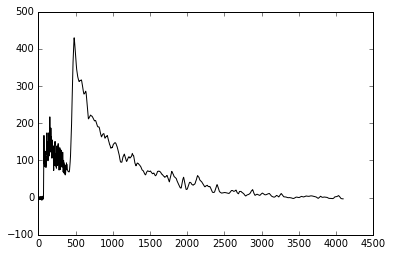

4406.241
0.05036715


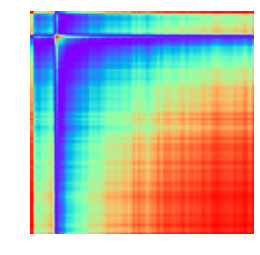

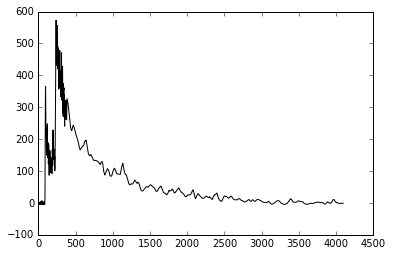

4292.0386
0.06798396


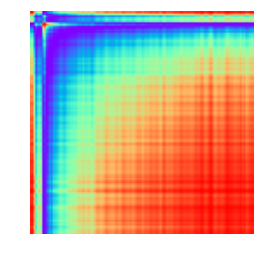

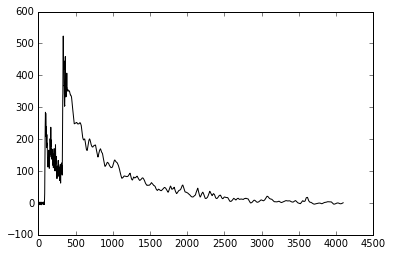

4562.7534
0.069703534


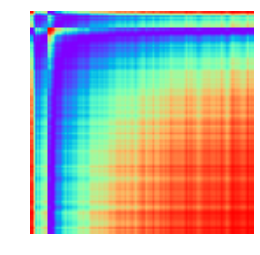

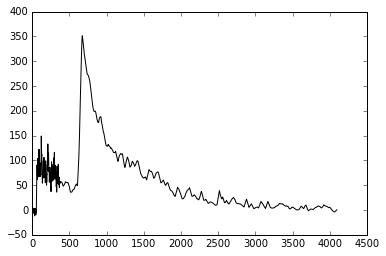

4143.552
0.043758046


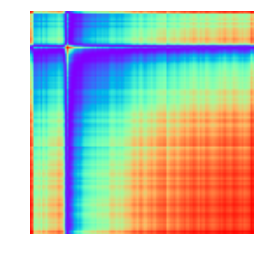

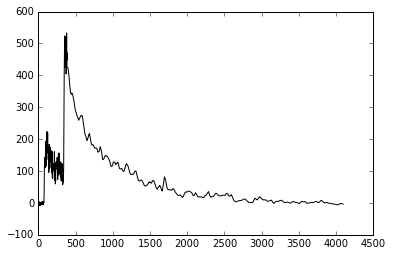

4305.382
0.055396136


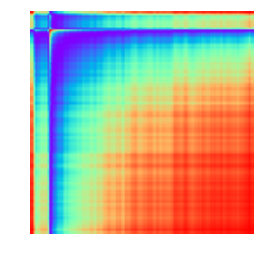

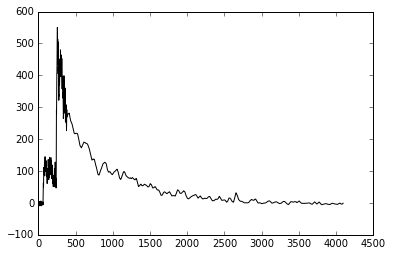

4018.2407
0.046103172


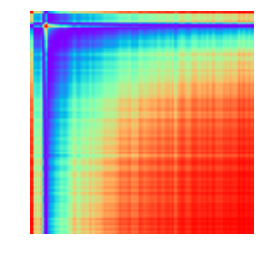

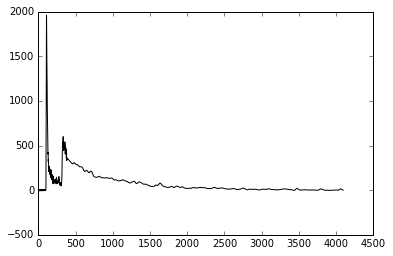

4700.1704
0.15012


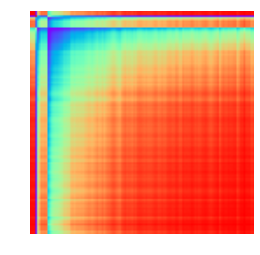

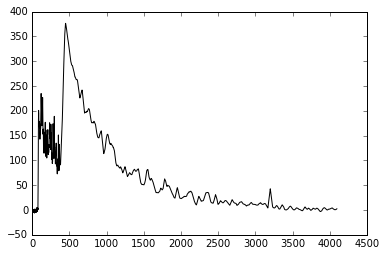

4718.7275
0.067372516


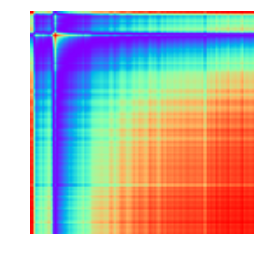

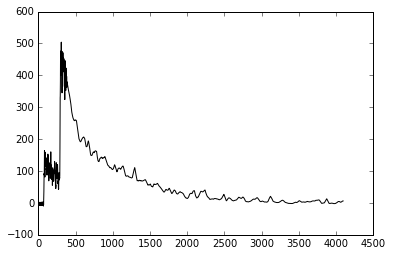

4034.289
0.046476234


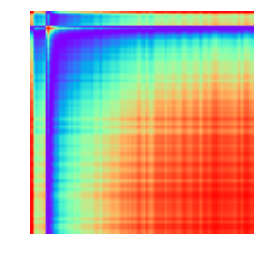

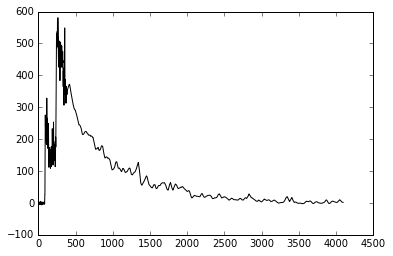

5011.825
0.060702246


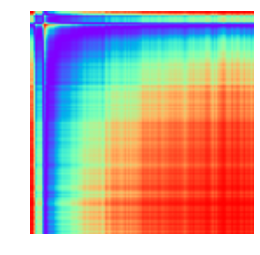

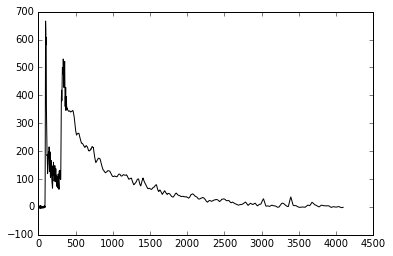

4391.139
0.07853104


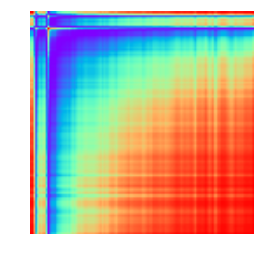

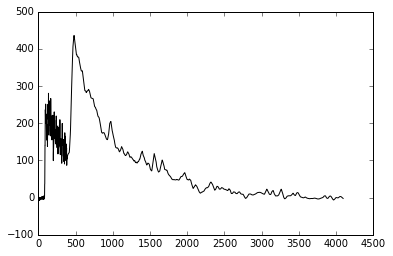

5074.7773
0.06611715


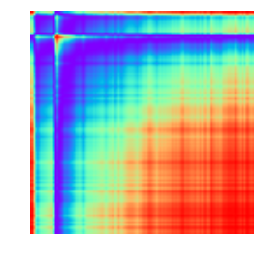

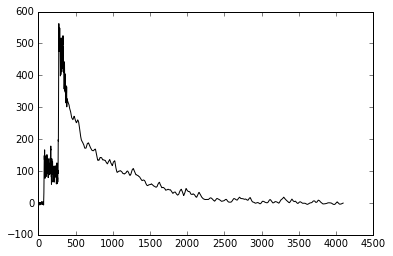

4256.9272
0.04516504


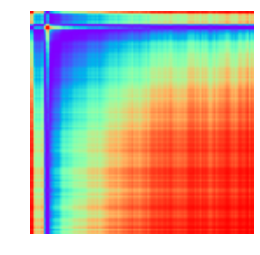

In [12]:
waveforms = reader_pmtall(file)
energy = reader(file,"Energy",1)
ratio4us = reader_lone(file,"Ratio4us")
length = len(waveforms)
psdpara1 = reader(file,"PSDPara",1)

print(len(waveforms))
# plt.figure()
# plt.hist(energy,bins=np.arange(0,6000,5))
# plt.show()

# plt.figure()
# plt.hist(ratio4us,bins=np.arange(0,2,0.01))
# plt.show()

# plt.figure()
# plt.hist(psdpara1)
# plt.show()

for i in range(20):
    k = np.random.randint(length)
    plt.figure()
    plt.plot(np.arange(4096),waveforms[k],color="k")
    plt.savefig("waveforms/ref.png")
    plt.show()
    print(energy[k])
    print(ratio4us[k])
    plot_gasf(waveforms[k], image_size=128, overlapping=False, scale='-1')
    plt.show()

